<a href="https://colab.research.google.com/github/hudza03/pbahudza2025/blob/main/week4pbahudza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn
!pip install nltk
!pip install Sastrawi
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.7 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
import nltk

from collections import Counter
from nltk.tokenize import word_tokenize
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
# Scrapping Google Apps Review - eg TransJatim
# NLP Pipeline PBA / Genap 2025

APP_ID = "ngi.muchi.jatimajaib"  # TransJatim
LANG = "id"
COUNTRY = "id"

app_info = app(APP_ID, lang=LANG, country=COUNTRY)
print("App Title :", app_info.get("title"))
print("App ID    :", APP_ID)
print("Installs  :", app_info.get("installs"))
print("Score     :", app_info.get("score"))
print("Ratings   :", app_info.get("ratings"))
print("Updated   :", app_info.get("updated"))


App Title : TRANSJATIM - AJAIB
App ID    : ngi.muchi.jatimajaib
Installs  : 500.000+
Score     : 4.611399
Ratings   : 1852
Updated   : 1765867856


In [4]:
from google_play_scraper import app, Sort, reviews_all

mbb_reviews = reviews_all(
    'ngi.muchi.jatimajaib',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [5]:
df_mbbrev = pd.DataFrame(np.array(mbb_reviews),columns=['content'])
df_mbbrev = df_mbbrev.join(pd.DataFrame(df_mbbrev.pop('content').tolist()))

In [6]:
def mask_username(username):
    if pd.isna(username):
        return username
    username = str(username)
    if len(username) <= 4:
        return "*" * len(username)
    return username[:2] + "*" * (len(username)-4) + username[-2:]

df_mbbrev['userName'] = df_mbbrev['userName'].apply(mask_username)

In [7]:
df_mbbrev.to_csv("transjatimajaib_raw.csv", index=False)

In [8]:
df_mbbrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,78c416e3-9ba3-4a19-95d7-414fe40b0c4d,Na************la,https://play-lh.googleusercontent.com/a-/ALV-U...,hopefully there will be more routes in Malang ...,4,0,1.2.9,2025-12-28 00:06:49,None,NaT,1.2.9
1,9c43d2ae-31a7-48d3-a669-5351f751d0b3,M.*********************ni,https://play-lh.googleusercontent.com/a-/ALV-U...,Gabisa login google di versi terbarunya di red...,1,0,1.2.9,2025-12-21 22:45:47,None,NaT,1.2.9
2,ac12fd97-5849-4af7-a4eb-033ae7f2673a,Ro*********ah,https://play-lh.googleusercontent.com/a-/ALV-U...,"gps-nya kadang sering ga akurat, adminnya resp...",5,0,1.2.7,2025-12-18 12:17:32,None,NaT,1.2.7
3,7392326f-7453-4142-bcaf-c76eafc72fd9,Fa*********dh,https://play-lh.googleusercontent.com/a-/ALV-U...,"gabisa login aplikasi, loading terus",1,0,1.2.8,2025-12-16 00:54:00,"Halo kak,Setelah kami lakukan pengecekan kondi...",2025-11-24 08:08:53,1.2.8
4,f27806d1-6920-4b29-9b28-818e2aa99c37,Gi**********di,https://play-lh.googleusercontent.com/a-/ALV-U...,bobrok ga bisa login,1,0,None,2025-12-11 05:45:00,None,NaT,None
...,...,...,...,...,...,...,...,...,...,...,...
97,1a76bb28-b22c-4105-a252-7fafc265a9a7,Bu******************ra,https://play-lh.googleusercontent.com/a-/ALV-U...,"1. Mohon ditambahkan Halte Alun-Alun Sidoarjo,...",4,1,1.0.3,2022-08-23 02:06:22,None,NaT,1.0.3
98,9864012f-6e8b-4d2f-ad3f-8ca247029580,Ag**********to,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong opsi pembayarannya diperbanyak, moga ad...",4,0,1.0.3,2022-08-22 14:30:36,Terima kasih atas masukannya\nUntuk pembayaran...,2022-08-27 01:21:16,1.0.3
99,536c1f71-4cd1-4a1b-b9de-4dd05599d9eb,GR****************************AW,https://play-lh.googleusercontent.com/a-/ALV-U...,top,5,0,1.0.3,2022-08-21 08:13:05,terimakasih ka atas support nya kepada transjatim,2023-03-08 06:07:15,1.0.3
100,2a3a2491-d904-4b72-bd06-a87c89b6efd9,im**********no,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasi nya sudah bagus. Mohon untuk metode p...,5,1,1.0.3,2022-08-20 06:18:50,Pembayaran bisa dilakukan secara tunai dan non...,2022-08-27 06:18:55,1.0.3


In [9]:
df_mbbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              102 non-null    object        
 1   userName              102 non-null    object        
 2   userImage             102 non-null    object        
 3   content               102 non-null    object        
 4   score                 102 non-null    int64         
 5   thumbsUpCount         102 non-null    int64         
 6   reviewCreatedVersion  84 non-null     object        
 7   at                    102 non-null    datetime64[ns]
 8   replyContent          36 non-null     object        
 9   repliedAt             36 non-null     datetime64[ns]
 10  appVersion            84 non-null     object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.9+ KB


Data preprocessing

Lowercasing

In [10]:
df_mbbrev['content'] = df_mbbrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print ("Before lowercasing:")
print(df_mbbrev['content'][11])
print(df_mbbrev['content'][1])
print(df_mbbrev['content'][20])
print ("\nAfter lowercasing:")
df_mbbrev['content']= df_mbbrev['content'].apply(lambda x: x.lower())
print(df_mbbrev['content'][11])
print(df_mbbrev['content'][1])
print(df_mbbrev['content'][20])

Before lowercasing:
masa payment gateway dimonopoli astra, harus pake astrapay, udah gitu tiket yang tersedia cuma umum, gaada tiket pelajar, percuma user interface bagus tapi dibandingkan sama aplikasi gobis yg jelek aja masih kalah
Gabisa login google di versi terbarunya di redmi note 14 pro, loading doang ga muncul pop up buat milih akun login nya
aplikasi dengan peta integrasi terbaik 🫰

After lowercasing:
masa payment gateway dimonopoli astra, harus pake astrapay, udah gitu tiket yang tersedia cuma umum, gaada tiket pelajar, percuma user interface bagus tapi dibandingkan sama aplikasi gobis yg jelek aja masih kalah
gabisa login google di versi terbarunya di redmi note 14 pro, loading doang ga muncul pop up buat milih akun login nya
aplikasi dengan peta integrasi terbaik 🫰


Tokenization

In [11]:
df_mbbrev['tokens'] = df_mbbrev['content'].str.lower().str.split()
all_tokens = [word for tokens in df_mbbrev['tokens'] for word in tokens]
counter = Counter(all_tokens)
top_50 = counter.most_common(50)
print(top_50)

[('di', 43), ('bisa', 24), ('untuk', 23), ('aplikasi', 21), ('dan', 21), ('sudah', 19), ('ada', 19), ('sangat', 18), ('halte', 16), ('dengan', 16), ('tidak', 14), ('rute', 14), ('yg', 13), ('bus', 13), ('penumpang', 12), ('lebih', 12), ('atau', 12), ('membantu', 11), ('armada', 11), ('login', 10), ('yang', 10), ('banyak', 10), ('ke', 9), ('pembayaran', 9), ('nya', 8), ('ini', 8), ('tolong', 8), ('kalau', 8), ('dari', 8), ('ga', 7), ('lama', 7), ('tapi', 7), ('2', 7), ('jam', 7), ('jangan', 7), ('terminal', 7), ('-', 7), ('info', 7), ('hanya', 6), ('saya', 6), ('antar', 6), ('terlalu', 6), ('karena', 6), ('lagi', 6), ('bunder', 6), ('mohon', 6), ('ditambahkan', 6), ('metode', 6), ('jumlah', 6), ('google', 5)]


Stopword

In [12]:
# Create stopword remover
factory = StopWordRemoverFactory()
id_stopwords = set(factory.get_stop_words())

# Apply stopword removal to the 'content' column
df_mbbrev['tokens_stopword_rm'] = df_mbbrev['tokens'].apply(lambda tokens: [w for w in tokens if w not in id_stopwords])

In [13]:
nltk.download('stopwords')

english_stopwords = set(stopwords.words('english'))

df_mbbrev['tokens_stopword_rm'] = df_mbbrev['tokens_stopword_rm'].apply(
    lambda tokens: [w for w in tokens if w not in english_stopwords]
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
print("stopwords removed:")
print (id_stopwords)
print (english_stopwords)

stopwords removed:
{'guna', 'antara', 'daripada', 'apalagi', 'dengan', 'tidak', 'sedangkan', 'agak', 'mengapa', 'sekitar', 'setidaknya', 'juga', 'adalah', 'sehingga', 'kita', 'tapi', 'ada', 'setelah', 'tetapi', 'itu', 'bagi', 'tanpa', 'dahulu', 'ingin', 'seperti', 'kepada', 'hanya', 'itulah', 'menurut', 'yang', 'sesuatu', 'masih', 'bahwa', 'kenapa', 'kami', 'oh', 'apakah', 'mari', 'akan', 'dll', 'yaitu', 'terhadap', 'sebelum', 'kembali', 'tolong', 'nggak', 'ya', 'sampai', 'amat', 'sesudah', 'dapat', 'boleh', 'sambil', 'toh', 'atau', 'pada', 'hal', 'selain', 'ini', 'lain', 'bisa', 'agar', 'dalam', 'dulunya', 'sebab', 'sebagai', 'selagi', 'di', 'anu', 'secara', 'dimana', 'saat', 'jika', 'sementara', 'nanti', 'pasti', 'seterusnya', 'lagi', 'harus', 'yakni', 'pula', 'ketika', 'melainkan', 'seharusnya', 'kemana', 'dan', 'namun', 'ia', 'dst', 'para', 'anda', 'sudah', 'belum', 'mereka', 'demi', 'oleh', 'ke', 'ok', 'supaya', 'sebetulnya', 'serta', 'saja', 'pun', 'begitu', 'untuk', 'maka', 'kec

In [15]:
print(df_mbbrev['tokens_stopword_rm'])

0      [hopefully, routes, malang, esp, arah, singosari]
1      [gabisa, login, google, versi, terbarunya, red...
2      [gps-nya, kadang, sering, ga, akurat,, adminny...
3             [gabisa, login, aplikasi,, loading, terus]
4                                    [bobrok, ga, login]
                             ...                        
97     [1., mohon, ditambahkan, halte, alun-alun, sid...
98     [opsi, pembayarannya, diperbanyak,, moga, arah...
99                                                 [top]
100    [aplikasi, nya, bagus., mohon, metode, pembaya...
101                   [kalau, ditambahkan, halte, perak]
Name: tokens_stopword_rm, Length: 102, dtype: object


Stemming

In [16]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk import pos_tag

# --- download resource nltk (sekali saja) ---
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# --- init tools ---
lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
indo_stemmer = factory.create_stemmer()

# slang mapping
slang_dict = {
    "ngga": "tidak",
    "ga": "tidak",
    "gk": "tidak",
    "nggak": "tidak",
    "yg": "yang",
    "tp": "tapi",
    "drivernya": "driver",
    "gpp" : "tidak apa-apa",
    "bgt" : "banget",
    "trs" : "terus",
    "td" : "tadi",
    "dmn" : "dimana",
    "kmn" : "kemana",
    "ap" : "apa",
    "jg" : "juga",
    "oke" : "baik",
    "bbrp" : "beberapa",
    "gw" : "saya",
    "sgt" : "sangat",
    "knp" : "kenapa",
    "skrg" : "sekarang",
    "cuma" : "hanya",
    "supir2" : "supir-supir",
    "udah" : "sudah",
    "milih" : "pilih",
    ":gabisa" : "tidak bisa"
}

# fungsi normalisasi 1 token
def normalize_word(w):
    w = w.lower()
    w = re.sub(r"[^\w]", "", w)  # buang tanda baca

    # slang replacement
    if w in slang_dict:
        return slang_dict[w]

    # buang sufiks umum Indo
    w = re.sub(r"(nya|lah|kah|pun|ku|mu)$", "", w)

    # buang prefix ter- (contoh: terkunci -> kunci)
    if w.startswith("ter") and len(w) > 4:
        w = w[3:]

    # English word
    if w.isascii() and w != "":
        pos = pos_tag([w])[0][1][0].upper()
        pos_map = {"J": "a", "N": "n", "V": "v", "R": "r"}
        return lemmatizer.lemmatize(w, pos_map.get(pos, "n"))

    # Indonesian word
    if w != "":
        return indo_stemmer.stem(w)

    return w

# --- apply ke seluruh dataframe ---
df_mbbrev["tokens_stemmed"] = df_mbbrev["tokens_stopword_rm"].apply(
    lambda tokens: [normalize_word(w) for w in tokens]
)

# cek hasil
print(df_mbbrev[["tokens_stopword_rm", "tokens_stemmed"]].head(15))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


                                   tokens_stopword_rm  \
0   [hopefully, routes, malang, esp, arah, singosari]   
1   [gabisa, login, google, versi, terbarunya, red...   
2   [gps-nya, kadang, sering, ga, akurat,, adminny...   
3          [gabisa, login, aplikasi,, loading, terus]   
4                                 [bobrok, ga, login]   
5   [gak, login., dijawab, sama, akun, dishub., "h...   
6   [ga, login, terus!!, selalu, pop, notif, reque...   
7   [sign, bermasalah,, add, account, gmail,, munc...   
8   [mantap., perlu, dikaji, penambahan, halte, be...   
9            [mau, log, pakai, email, gabisa, terus.]   
10  [login, google, aplikasi, transjatim, sangat, ...   
11  [masa, payment, gateway, dimonopoli, astra,, p...   
12                            [jos, joss, malangraya]   
13                                      [ngga, login]   
14        [ac, kurang, dingin,, jadi, terasa, pengap]   

                                       tokens_stemmed  
0    [hopefully, route, malang,

Word Frequency Analysis

In [17]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2910941298.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


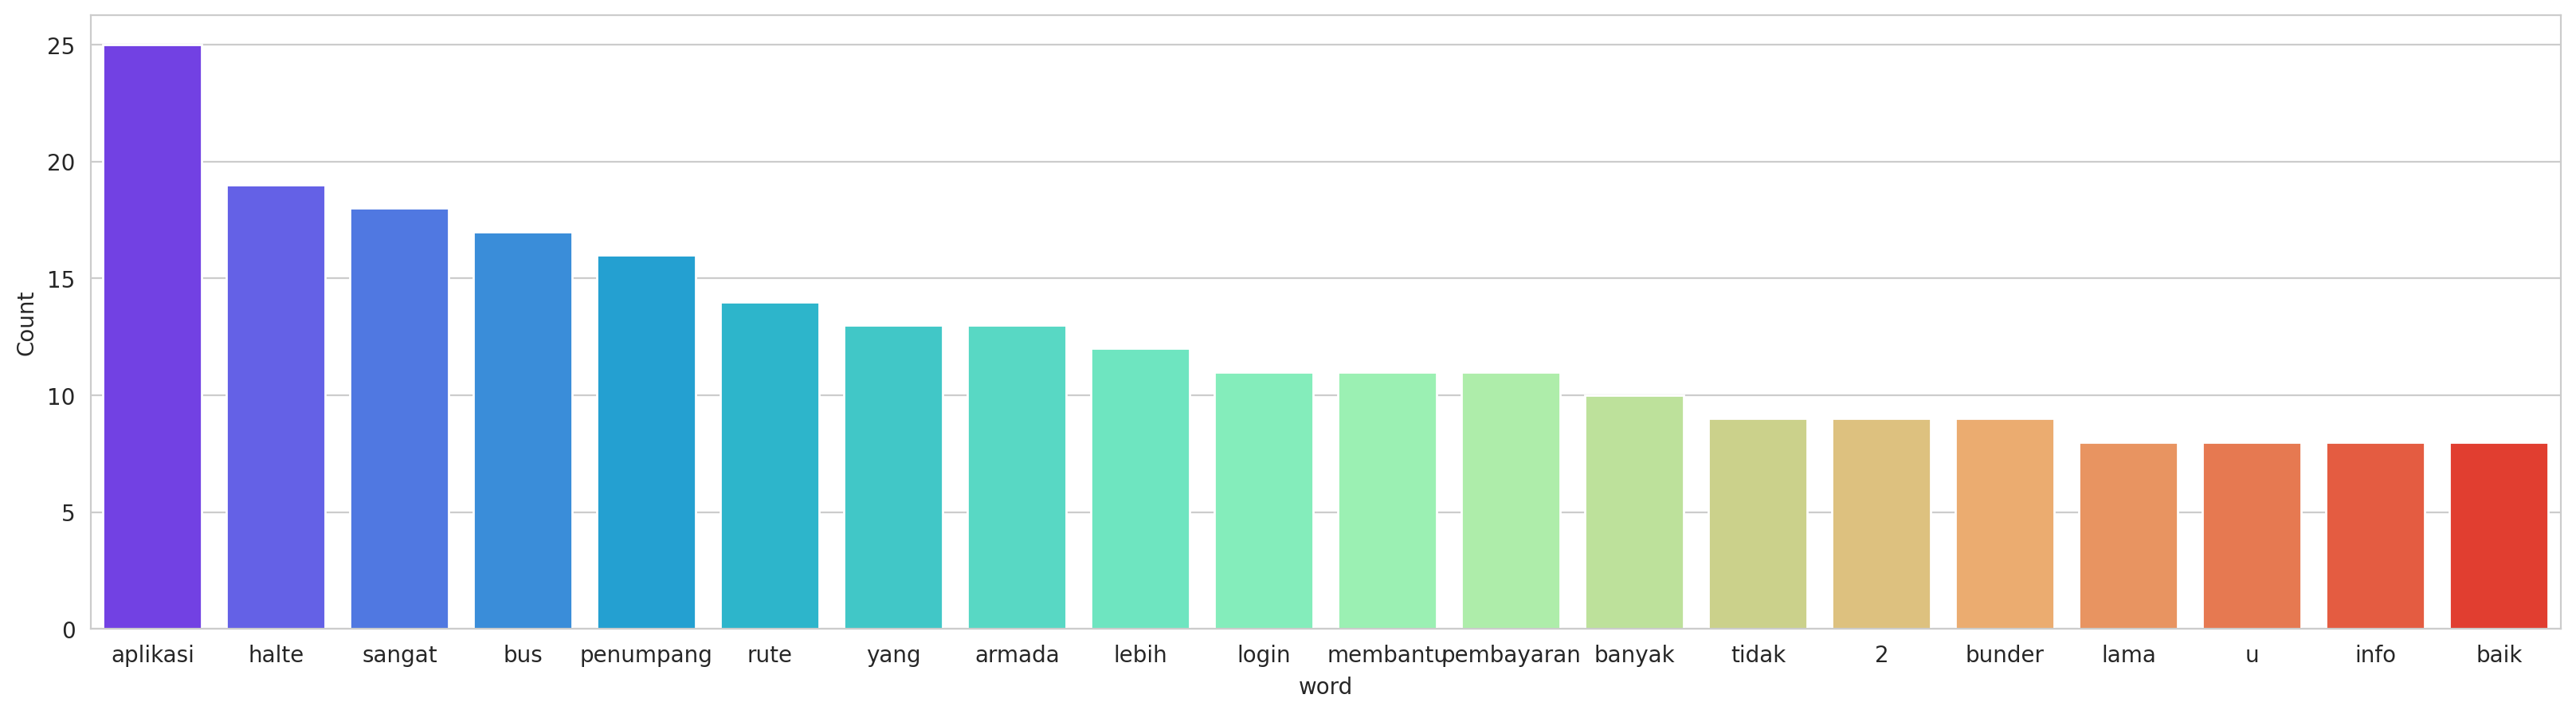

In [18]:
freq_words(df_mbbrev['tokens_stemmed'].apply(lambda x: ' '.join(x)), 20)

In [19]:
custom_stopwords = {"driver", "aplikasi", "app", "bus", "trans", "jatim", "apps", "transjatim", "ajaib", "order", "book"}

df_mbbrev['Cleaned_Text'] = df_mbbrev['tokens_stemmed'].apply(
    lambda tokens: ' '.join([word for word in tokens if word not in custom_stopwords])
)

print(df_mbbrev[['tokens_stemmed', 'Cleaned_Text']].head())

                                      tokens_stemmed  \
0   [hopefully, route, malang, esp, arah, singosari]   
1  [gabisa, login, google, versi, baru, redmi, no...   
2  [gps, kadang, sering, tidak, akurat, admin, re...   
3                 [gabisa, login, aplikasi, load, u]   
4                             [bobrok, tidak, login]   

                                        Cleaned_Text  
0          hopefully route malang esp arah singosari  
1  gabisa login google versi baru redmi note 14 p...  
2  gps kadang sering tidak akurat admin responsiv...  
3                                gabisa login load u  
4                                 bobrok tidak login  


In [20]:
df_mbbrev['content'] = df_mbbrev['Cleaned_Text'].astype(str)

In [21]:
df_to_save = df_mbbrev.drop(columns=["tokens", "tokens_stopword_rm", "Cleaned_Text", "Cleaned_Text", "tokens_stemmed"])

In [22]:
df_mbbrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,tokens,tokens_stopword_rm,tokens_stemmed,Cleaned_Text
0,78c416e3-9ba3-4a19-95d7-414fe40b0c4d,Na************la,https://play-lh.googleusercontent.com/a-/ALV-U...,hopefully route malang esp arah singosari,4,0,1.2.9,2025-12-28 00:06:49,None,NaT,1.2.9,"[hopefully, there, will, be, more, routes, in,...","[hopefully, routes, malang, esp, arah, singosari]","[hopefully, route, malang, esp, arah, singosari]",hopefully route malang esp arah singosari
1,9c43d2ae-31a7-48d3-a669-5351f751d0b3,M.*********************ni,https://play-lh.googleusercontent.com/a-/ALV-U...,gabisa login google versi baru redmi note 14 p...,1,0,1.2.9,2025-12-21 22:45:47,None,NaT,1.2.9,"[gabisa, login, google, di, versi, terbarunya,...","[gabisa, login, google, versi, terbarunya, red...","[gabisa, login, google, versi, baru, redmi, no...",gabisa login google versi baru redmi note 14 p...
2,ac12fd97-5849-4af7-a4eb-033ae7f2673a,Ro*********ah,https://play-lh.googleusercontent.com/a-/ALV-U...,gps kadang sering tidak akurat admin responsiv...,5,0,1.2.7,2025-12-18 12:17:32,None,NaT,1.2.7,"[gps-nya, kadang, sering, ga, akurat,, adminny...","[gps-nya, kadang, sering, ga, akurat,, adminny...","[gps, kadang, sering, tidak, akurat, admin, re...",gps kadang sering tidak akurat admin responsiv...
3,7392326f-7453-4142-bcaf-c76eafc72fd9,Fa*********dh,https://play-lh.googleusercontent.com/a-/ALV-U...,gabisa login load u,1,0,1.2.8,2025-12-16 00:54:00,"Halo kak,Setelah kami lakukan pengecekan kondi...",2025-11-24 08:08:53,1.2.8,"[gabisa, login, aplikasi,, loading, terus]","[gabisa, login, aplikasi,, loading, terus]","[gabisa, login, aplikasi, load, u]",gabisa login load u
4,f27806d1-6920-4b29-9b28-818e2aa99c37,Gi**********di,https://play-lh.googleusercontent.com/a-/ALV-U...,bobrok tidak login,1,0,None,2025-12-11 05:45:00,None,NaT,None,"[bobrok, ga, bisa, login]","[bobrok, ga, login]","[bobrok, tidak, login]",bobrok tidak login
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1a76bb28-b22c-4105-a252-7fafc265a9a7,Bu******************ra,https://play-lh.googleusercontent.com/a-/ALV-U...,1 mohon ditambahkan halte alunalun sidoarjo me...,4,1,1.0.3,2022-08-23 02:06:22,None,NaT,1.0.3,"[1., mohon, ditambahkan, halte, alun-alun, sid...","[1., mohon, ditambahkan, halte, alun-alun, sid...","[1, mohon, ditambahkan, halte, alunalun, sidoa...",1 mohon ditambahkan halte alunalun sidoarjo me...
98,9864012f-6e8b-4d2f-ad3f-8ca247029580,Ag**********to,https://play-lh.googleusercontent.com/a-/ALV-U...,opsi pembayaran diperbanyak moga arah sidoarjo...,4,0,1.0.3,2022-08-22 14:30:36,Terima kasih atas masukannya\nUntuk pembayaran...,2022-08-27 01:21:16,1.0.3,"[tolong, opsi, pembayarannya, diperbanyak,, mo...","[opsi, pembayarannya, diperbanyak,, moga, arah...","[opsi, pembayaran, diperbanyak, moga, arah, si...",opsi pembayaran diperbanyak moga arah sidoarjo...
99,536c1f71-4cd1-4a1b-b9de-4dd05599d9eb,GR****************************AW,https://play-lh.googleusercontent.com/a-/ALV-U...,top,5,0,1.0.3,2022-08-21 08:13:05,terimakasih ka atas support nya kepada transjatim,2023-03-08 06:07:15,1.0.3,[top],[top],[top],top
100,2a3a2491-d904-4b72-bd06-a87c89b6efd9,im**********no,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus mohon metode pembayaran utk diperbanya...,5,1,1.0.3,2022-08-20 06:18:50,Pembayaran bisa dilakukan secara tunai dan non...,2022-08-27 06:18:55,1.0.3,"[aplikasi, nya, sudah, bagus., mohon, untuk, m...","[aplikasi, nya, bagus., mohon, metode, pembaya...","[aplikasi, , bagus, mohon, metode, pembayaran,...",bagus mohon metode pembayaran utk diperbanya...


In [ ]:
Sentiment Analysis

In [23]:
from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_mbbrev['sentiment_polarity'] = df_mbbrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_mbbrev['sentiment_subjective'] = df_mbbrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [24]:
df_mbbrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,hopefully route malang esp arah singosari,4,0.00,0.0
1,gabisa login google versi baru redmi note 14 p...,1,0.00,0.0
2,gps kadang sering tidak akurat admin responsiv...,5,0.05,0.5
3,gabisa login load u,1,0.00,0.0
4,bobrok tidak login,1,0.00,0.0
...,...,...,...,...
97,1 mohon ditambahkan halte alunalun sidoarjo me...,4,0.00,0.0
98,opsi pembayaran diperbanyak moga arah sidoarjo...,4,0.00,0.0
99,top,5,0.50,0.5
100,bagus mohon metode pembayaran utk diperbanya...,5,0.00,0.0


In [29]:
# 50 Positive Review
num_positive = df_mbbrev[df_mbbrev['sentiment_polarity'] > 0].shape[0]
sample_positive = min(50, num_positive)
df_positive = df_mbbrev[df_mbbrev['sentiment_polarity'] > 0].sample(sample_positive, random_state=42)

# 50 Negative Review
num_negative = df_mbbrev[df_mbbrev['sentiment_polarity'] < 0].shape[0]
sample_negative = min(50, num_negative)
df_negative = df_mbbrev[df_mbbrev['sentiment_polarity'] < 0].sample(sample_negative, random_state=42)

# Merge
df_sampled = pd.concat([df_positive, df_negative])

# Tampilkan hanya kolom yang diinginkan
df_sampled = df_sampled.loc[:, ["content", "score", "sentiment_polarity", "sentiment_subjective"]]

df_sampled.head(10)

,content,score,sentiment_polarity,sentiment_subjective
57,track top info tujuan akhir top info penumpang...,5,0.500000,0.500000
2,gps kadang sering tidak akurat admin responsiv...,5,0.050000,0.500000
66,update baru info jum penumpang good job edit ...,5,0.450000,0.450000
99,top,5,0.500000,0.500000
16,cant login even already make new google account,1,0.136364,0.454545
10,login google sangat bermasa vivo o 15 versi ba...,1,0.150000,0.650000
65,tambahkan fitur laporan armada misal style uga...,5,0.400000,0.400000
45,useful good real time track,5,0.400000,0.300000
61,baik alang lebih bagus apabila depan metode pe...,5,0.375000,0.500000
28,launch harap siapkan server jaringan normal di...,1,0.150000,0.650000


Review positif

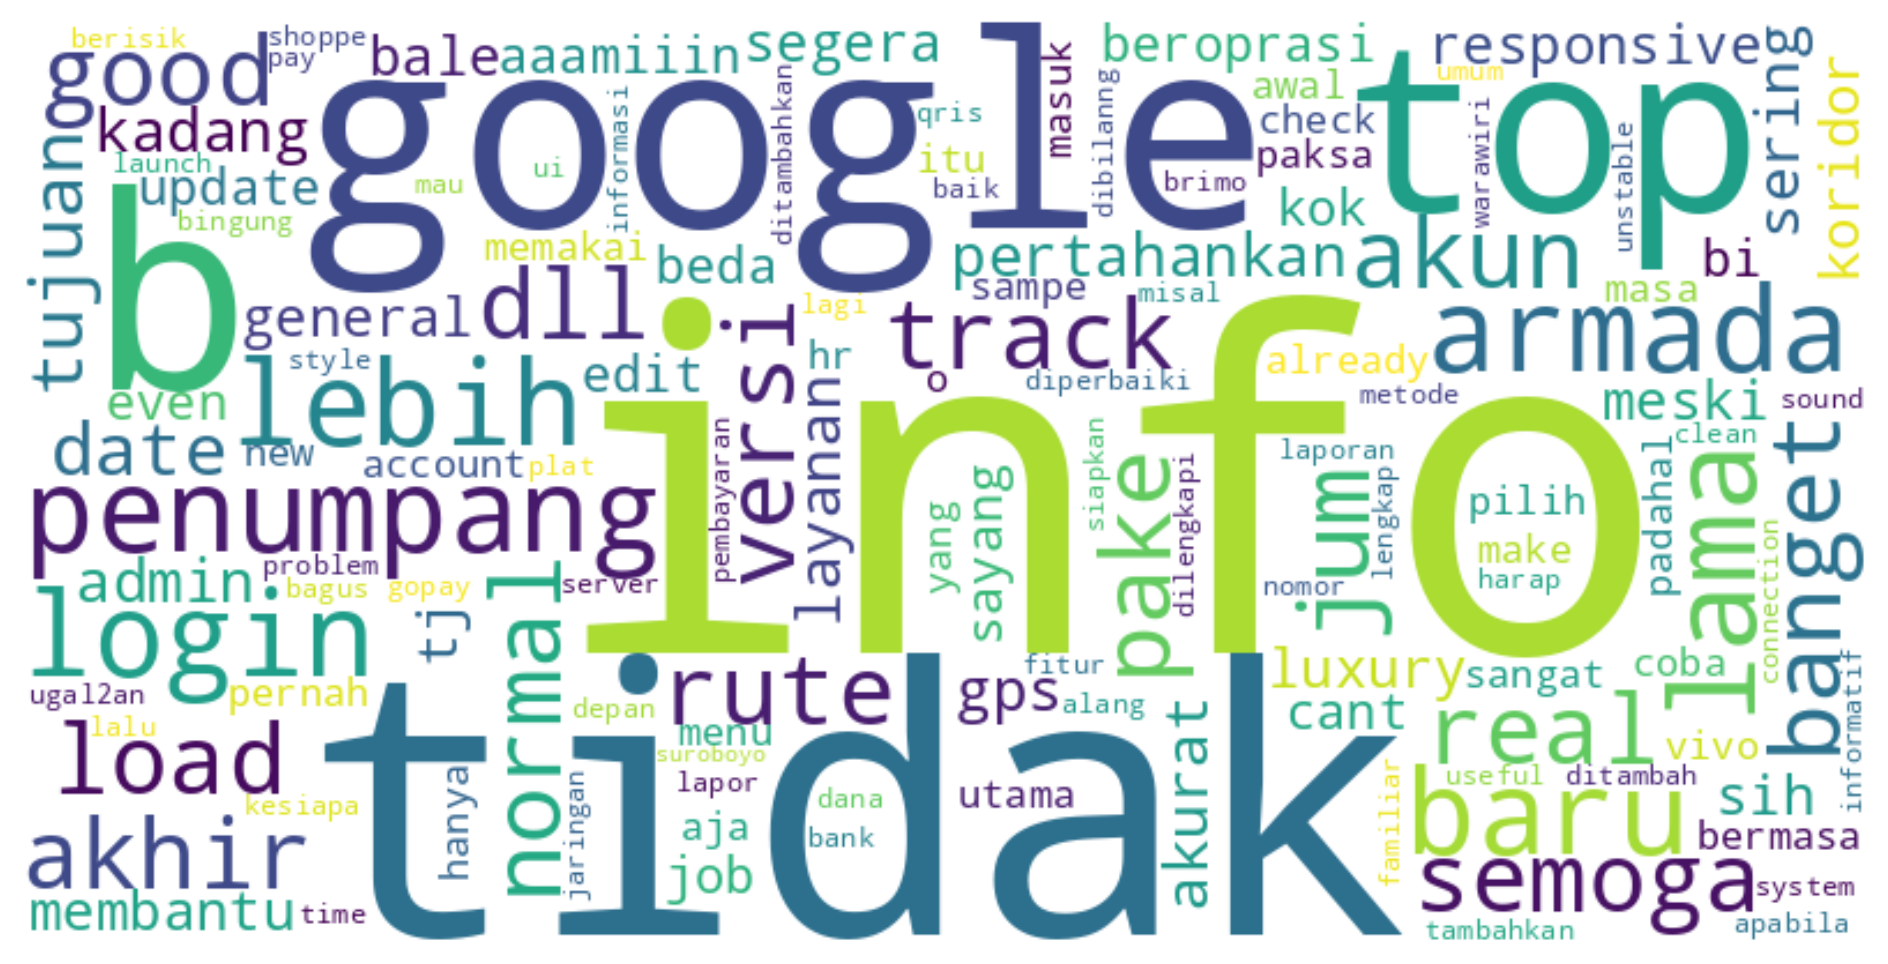

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua teks jadi satu
text = " ".join(df_positive['content'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
Review negatif

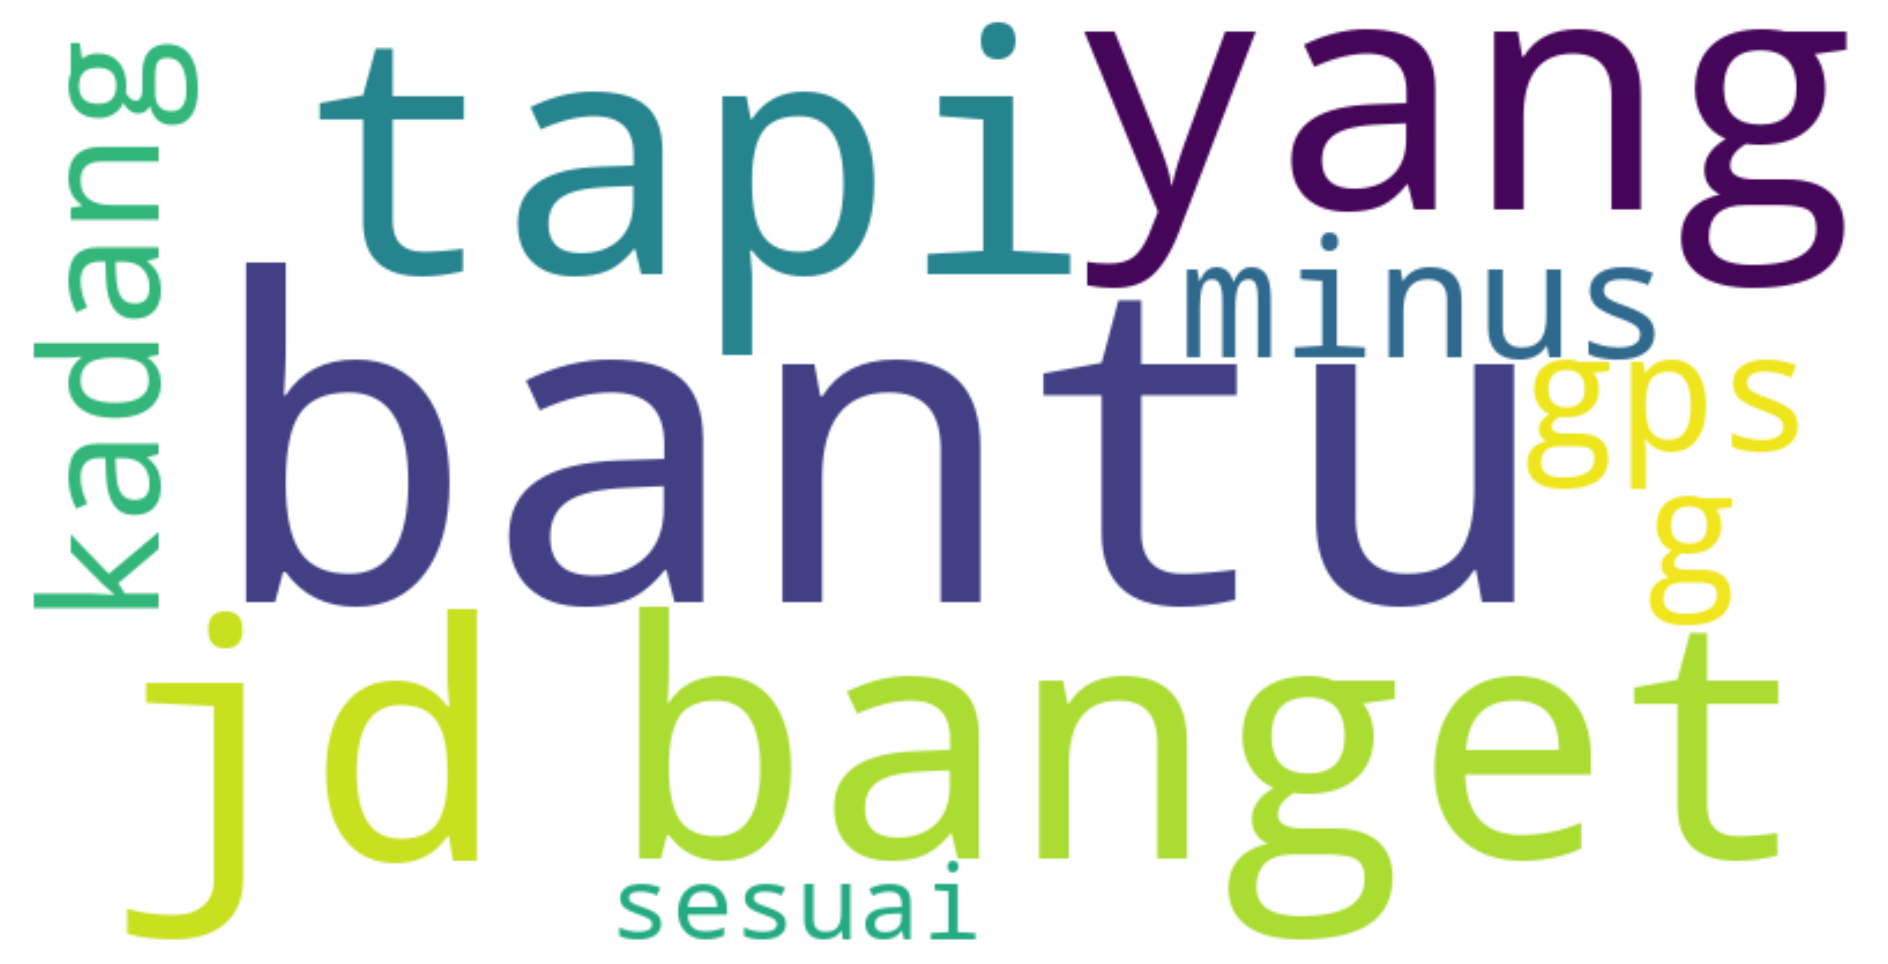

In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Gabungkan semua teks jadi satu
text = " ".join(df_negative['content'].astype(str))

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200
).generate(text)

# Tampilkan
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
# Save clean dataset
df_mbbrev.to_csv('transjatimajaib_clean.csv', index=False)
print("Clean dataset saved as transjatimajaib_clean.csv")

Clean dataset saved as transjatimajaib_clean.csv


TF-TDF

In [35]:
!pip install tensorflow_hub
!pip install xgboost

In [37]:
import pandas as pd
import numpy as np
import nltk
import re
import torch
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('stopwords')
nltk.download('words')
nltk.download('wordnet')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [38]:
is_cuda = torch.cuda.is_available()
device = torch.device("cuda" if is_cuda else "cpu")
print("Using:", device)

Using: cpu


In [40]:
df = pd.read_csv("transjatimajaib_clean.csv")
print("Dataset shape before:", df.shape)

# Keep only necessary columns
df = df[['content', 'score']].dropna()
print("Dataset shape after:", df.shape)
df.head()

Dataset shape before: (102, 17)
Dataset shape after: (101, 2)


,content,score
0,hopefully route malang esp arah singosari,4
1,gabisa login google versi baru redmi note 14 p...,1
2,gps kadang sering tidak akurat admin responsiv...,5
3,gabisa login load u,1
4,bobrok tidak login,1


Label encoding

In [41]:
def score_to_sentiment(score):
    if score <= 2:
        return 0   # negative
    elif score >= 4:
        return 1   # positive
    else:
        return None  # drop neutral

df['sentiment'] = df['score'].apply(score_to_sentiment)
df = df.dropna(subset=['sentiment'])
df['sentiment'] = df['sentiment'].astype(int)

print("Dataset shape after:", df.shape)
print(df['sentiment'].value_counts())

Dataset shape after: (90, 3)
sentiment
1    62
0    28
Name: count, dtype: int64


In [ ]:
Preprocess text

In [44]:
import nltk
nltk.download('punkt_tab')

def preprocess_text(text):
    text = re.sub(r'<[^>]*>', '', str(text))
    text = text.strip()
    text = re.sub(r'[^‌‍\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['content'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Train test split

In [45]:
x = df['content']
y = df['sentiment']

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


Classifier

In [46]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)
from timeit import default_timer as timer

svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(
    n_estimators=100, max_depth=3, max_features='sqrt',
    min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0
)

def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    return (
        y_pred,
        accuracy_score(ytest, y_pred),
        precision_score(ytest, y_pred),
        recall_score(ytest, y_pred),
        f1_score(ytest, y_pred),
        classification_report(ytest, y_pred),
        confusion_matrix(ytest, y_pred),
    )

batch_size = 1000

- TF-IDF

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

start = timer()
tfidf_vectorizer_xtrain = tfidf_vectorizer.fit_transform(xtrain).toarray()
tfidf_vectorizer_xtest = tfidf_vectorizer.transform(xtest).toarray()
print("TFIDF embedding time:", timer() - start)

# Train classifiers dengan objek baru (supaya nggak ketimpa)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

svm_tfidf = LinearSVC().fit(tfidf_vectorizer_xtrain, ytrain)
lr_tfidf  = LogisticRegression(max_iter=1000).fit(tfidf_vectorizer_xtrain, ytrain)
nb_tfidf  = MultinomialNB().fit(tfidf_vectorizer_xtrain, ytrain)
xgb_tfidf = XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(tfidf_vectorizer_xtrain, ytrain)
rfc_tfidf = RandomForestClassifier().fit(tfidf_vectorizer_xtrain, ytrain)

# Evaluate contoh (boleh skip kalau langsung mau ke akurasi semua model)
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, cm_svm = evaluate_model(
    svm_tfidf, tfidf_vectorizer_xtest, ytest
)
print("SVM TFIDF Accuracy:", accuracy_svm)

TFIDF embedding time: 0.04183084900000722


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:59:29] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM TFIDF Accuracy: 0.7777777777777778


- Universal Sentence Encoder

In [48]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

start = timer()
xtrain_use = np.array(embed(xtrain.tolist()))
xtest_use = np.array(embed(xtest.tolist()))
print("USE embedding time:", timer() - start)

# Train classifiers dengan objek baru (supaya tidak ketimpa TF-IDF/TFIDF+USE)
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

svm_use = LinearSVC().fit(xtrain_use, ytrain)
lr_use  = LogisticRegression(max_iter=1000).fit(xtrain_use, ytrain)
xgb_use = XGBClassifier(use_label_encoder=False, eval_metric="logloss").fit(xtrain_use, ytrain)
rfc_use = RandomForestClassifier().fit(xtrain_use, ytrain)

# Evaluasi contoh
y_pred_svm_use, accuracy_svm_use, _, _, _, _, _ = evaluate_model(svm_use, xtest_use, ytest)
print("SVM USE Accuracy:", accuracy_svm_use)

USE embedding time: 1.2247647009999127


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:00:37] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SVM USE Accuracy: 0.7777777777777778


- TF-IDF + USE

In [49]:
xtrain_combined = np.concatenate([tfidf_vectorizer_xtrain, xtrain_use], axis=1)
xtest_combined = np.concatenate([tfidf_vectorizer_xtest, xtest_use], axis=1)

svm_tfidf_use = svm_classifier.fit(xtrain_combined, ytrain)
lr_tfidf_use = logistic_regression.fit(xtrain_combined, ytrain)
xgboost_tfidf_use = xgboost_classifier.fit(xtrain_combined, ytrain)
rfc_tfidf_use = random_forest_classifier.fit(xtrain_combined, ytrain)

y_pred_svm_tfidf_use, accuracy_svm_tfidf_use, _, _, _, _, _ = evaluate_model(
    svm_tfidf_use, xtest_combined, ytest
)
print("SVM TFIDF+USE Accuracy:", accuracy_svm_tfidf_use)

SVM TFIDF+USE Accuracy: 0.7777777777777778


Visualisasi TF-IDF

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

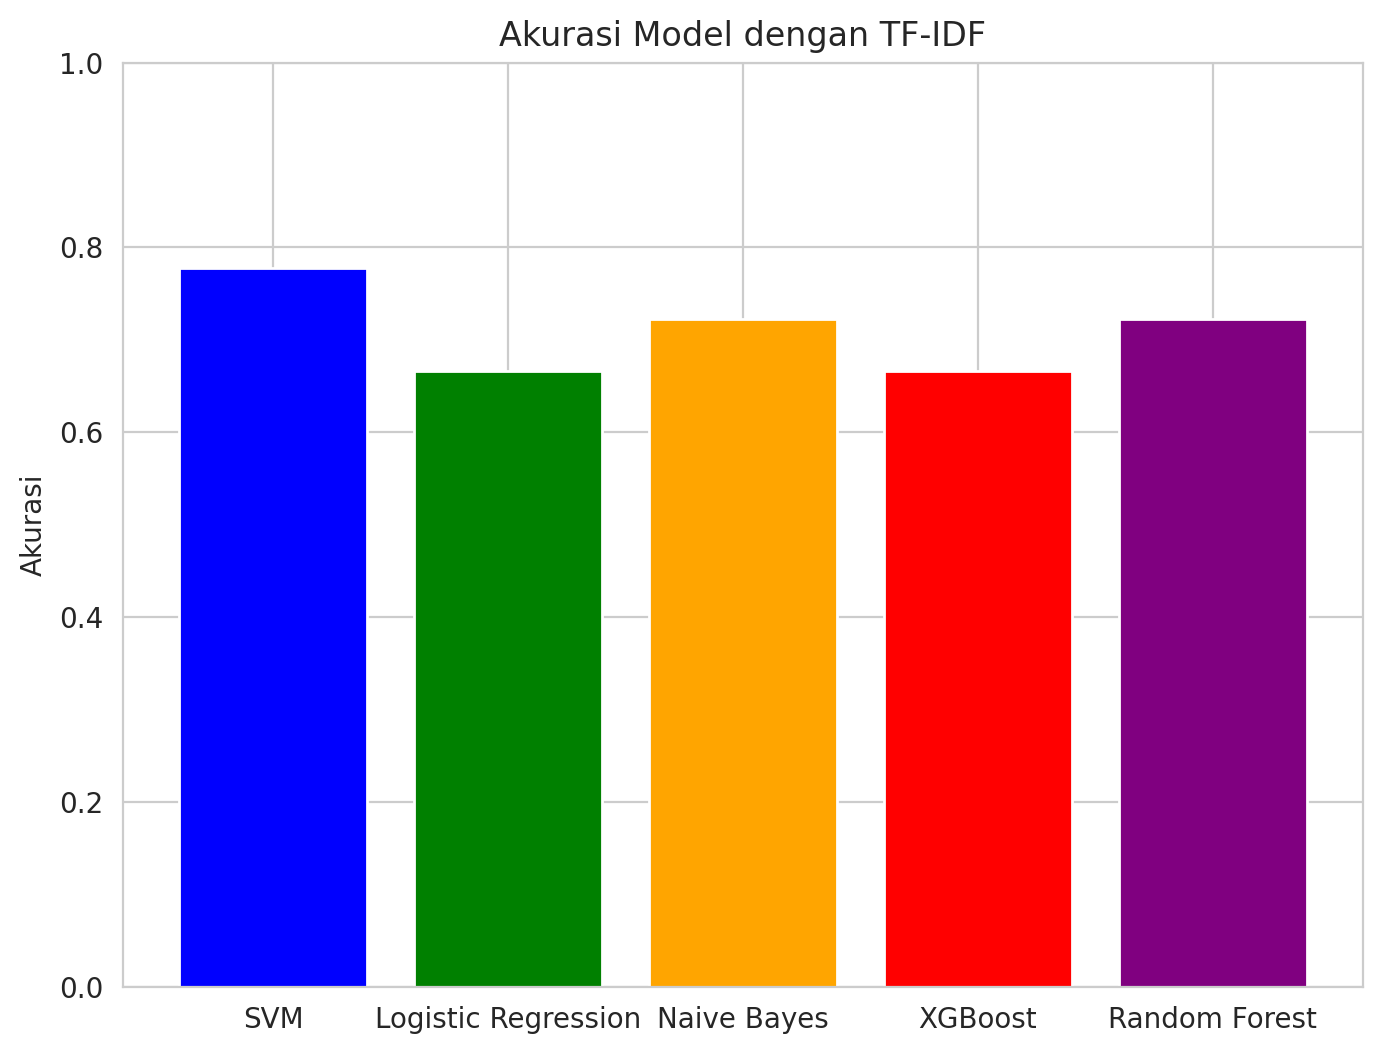

In [50]:
accuracy_svm_tfidf = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, ytest)[1]
accuracy_lr_tfidf  = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, ytest)[1]
accuracy_nb_tfidf  = evaluate_model(nb_tfidf, tfidf_vectorizer_xtest, ytest)[1]
accuracy_xgb_tfidf = evaluate_model(xgb_tfidf, tfidf_vectorizer_xtest, ytest)[1]
accuracy_rfc_tfidf = evaluate_model(rfc_tfidf, tfidf_vectorizer_xtest, ytest)[1]

models_tfidf = ["SVM", "Logistic Regression", "Naive Bayes", "XGBoost", "Random Forest"]
tfidf_accuracies = [accuracy_svm_tfidf, accuracy_lr_tfidf, accuracy_nb_tfidf, accuracy_xgb_tfidf, accuracy_rfc_tfidf]

plt.figure(figsize=(8,6))
plt.bar(models_tfidf, tfidf_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Akurasi Model dengan TF-IDF")
plt.ylabel("Akurasi")
plt.ylim(0,1)
plt.show()

In [ ]:
Visualisasi USE

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


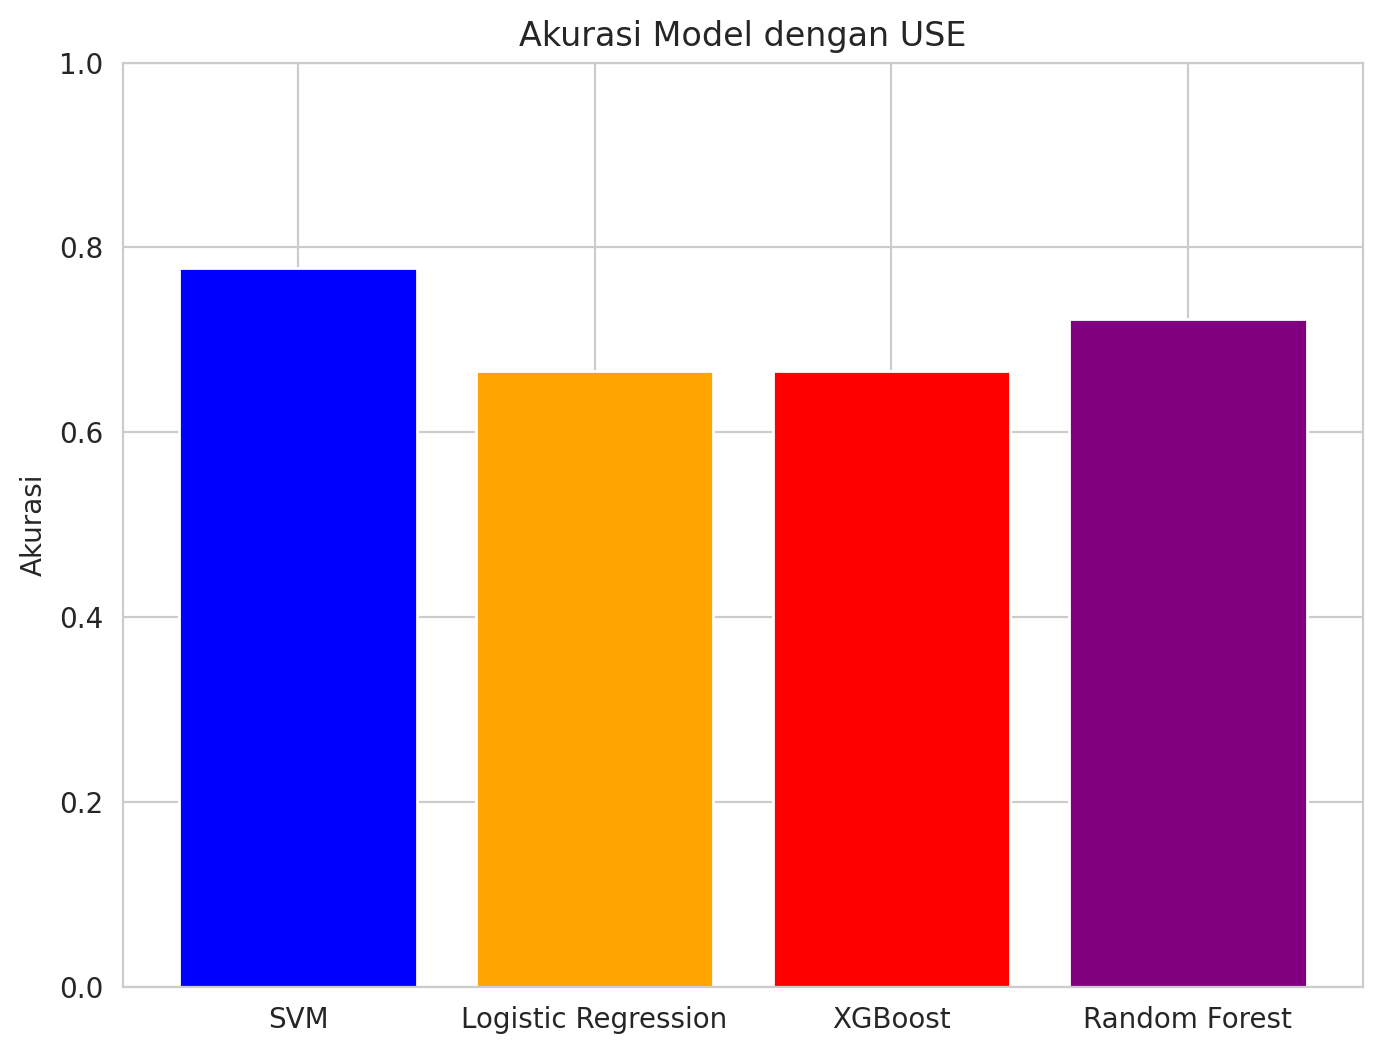

In [51]:
accuracy_svm_use = evaluate_model(svm_use, xtest_use, ytest)[1]
accuracy_lr_use  = evaluate_model(lr_use, xtest_use, ytest)[1]
accuracy_xgb_use = evaluate_model(xgb_use, xtest_use, ytest)[1]
accuracy_rfc_use = evaluate_model(rfc_use, xtest_use, ytest)[1]

models_use = ["SVM", "Logistic Regression", "XGBoost", "Random Forest"]
use_accuracies = [accuracy_svm_use, accuracy_lr_use, accuracy_xgb_use, accuracy_rfc_use]

plt.figure(figsize=(8,6))
plt.bar(models_use, use_accuracies, color=['blue', 'orange', 'red', 'purple'])
plt.title("Akurasi Model dengan USE")
plt.ylabel("Akurasi")
plt.ylim(0,1)
plt.show()

In [ ]:
Visualisasi TF-IDF + USE

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

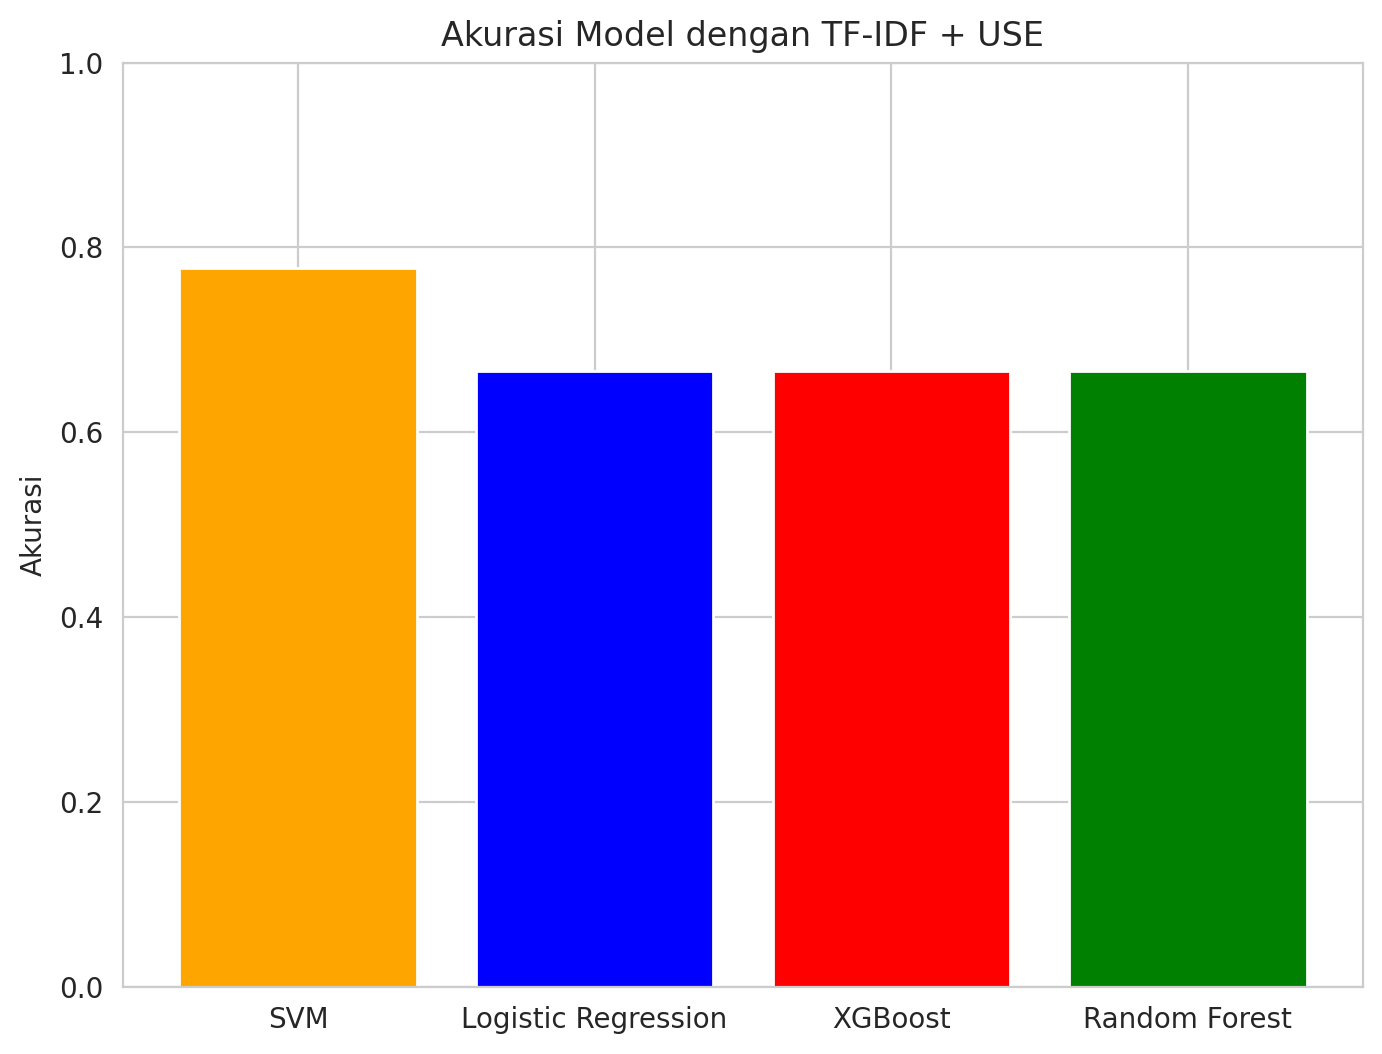

In [52]:
accuracy_svm_comb = evaluate_model(svm_tfidf_use, xtest_combined, ytest)[1]
accuracy_lr_comb  = evaluate_model(lr_tfidf_use, xtest_combined, ytest)[1]
accuracy_xgb_comb = evaluate_model(xgboost_tfidf_use, xtest_combined, ytest)[1]
accuracy_rfc_comb = evaluate_model(rfc_tfidf_use, xtest_combined, ytest)[1]

models_comb = ["SVM", "Logistic Regression", "XGBoost", "Random Forest"]
combined_accuracies = [accuracy_svm_comb, accuracy_lr_comb, accuracy_xgb_comb, accuracy_rfc_comb]

plt.figure(figsize=(8,6))
plt.bar(models_comb, combined_accuracies, color=['orange', 'blue', 'red', 'green'])
plt.title("Akurasi Model dengan TF-IDF + USE")
plt.ylabel("Akurasi")
plt.ylim(0,1)
plt.show()

Visualisasi total

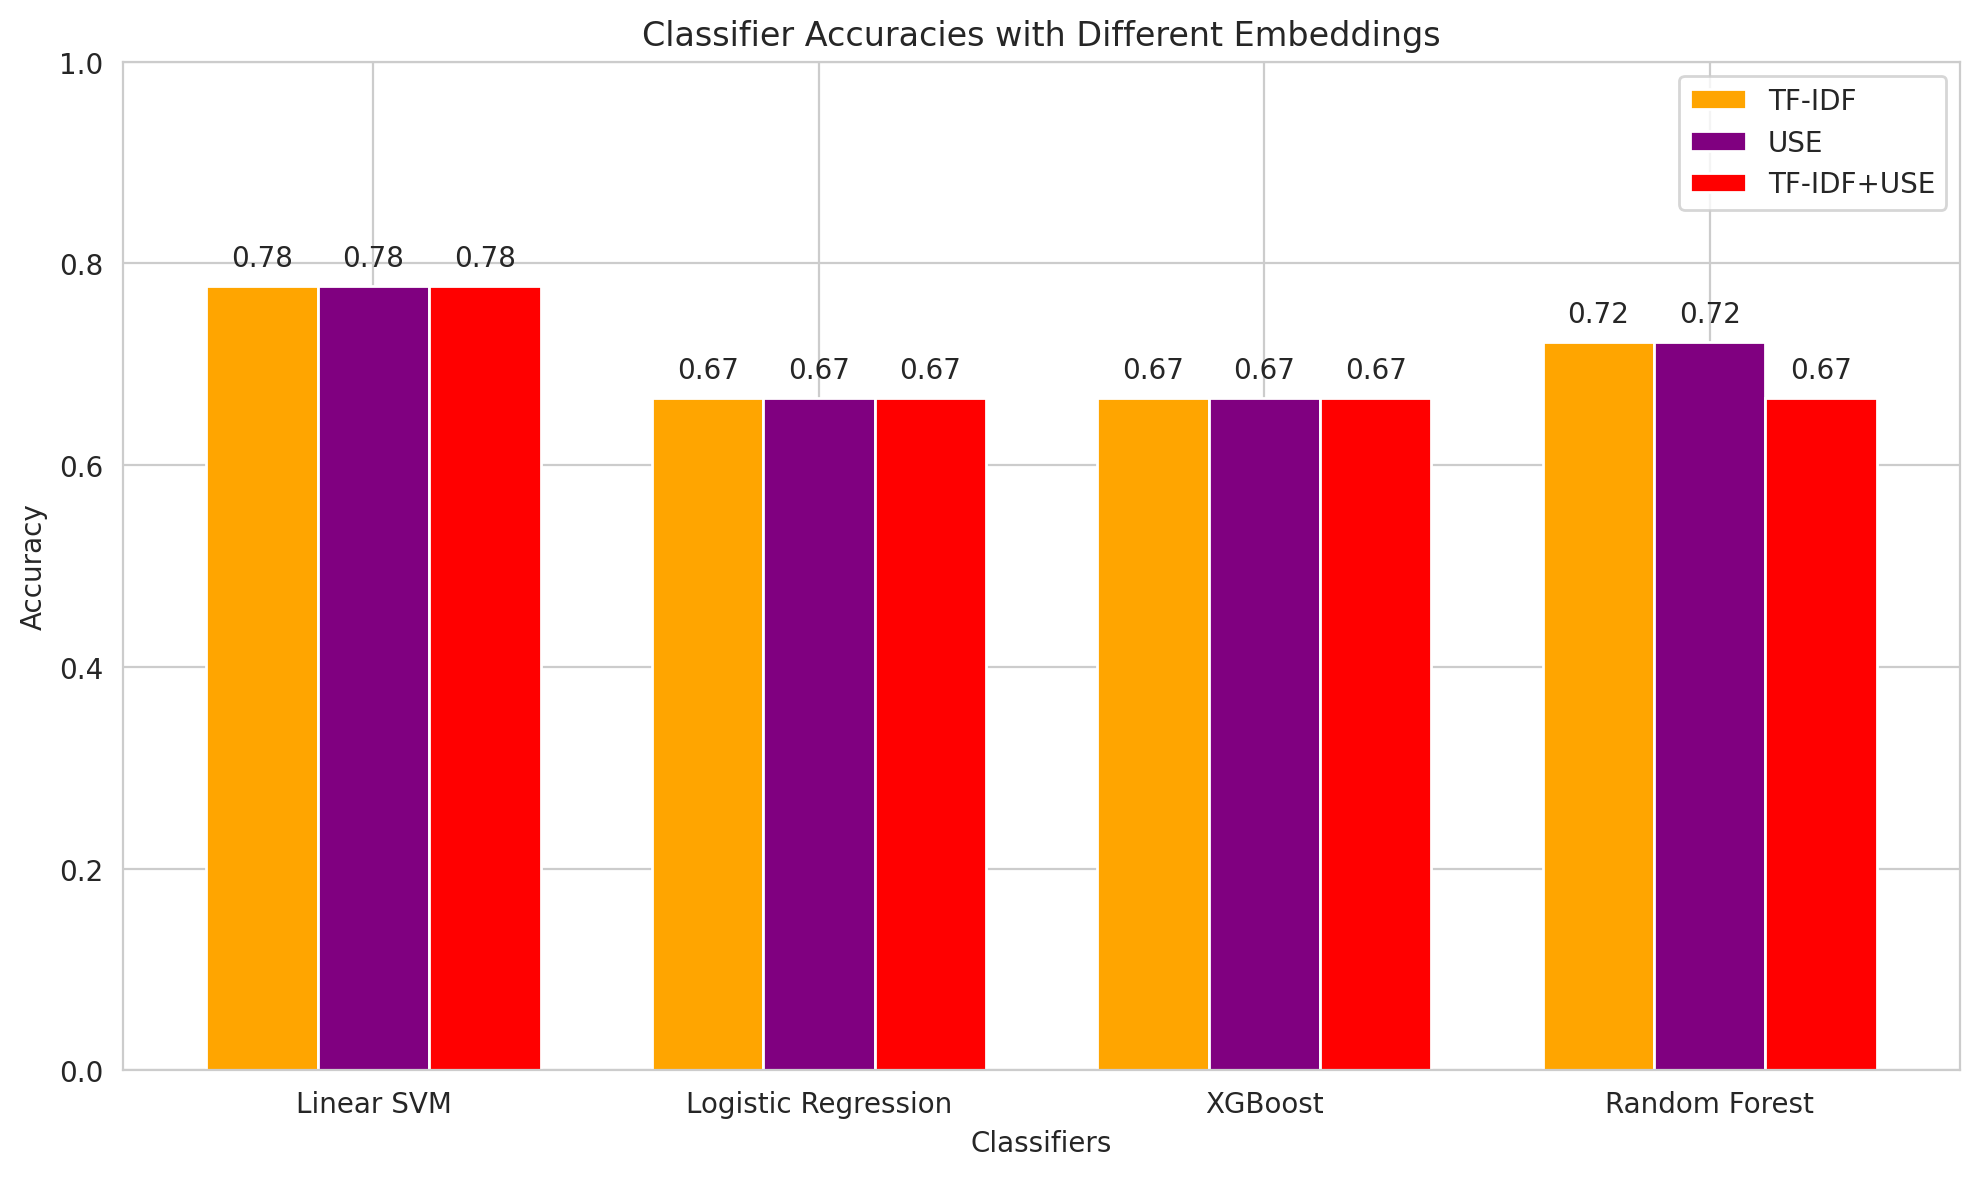

In [53]:
# Define the classifiers and their corresponding accuracies
classifiers = ["Linear SVM", "Logistic Regression", "XGBoost", "Random Forest"]

# TF-IDF
tfidf_accuracies = [
    accuracy_svm_tfidf,
    accuracy_lr_tfidf,
    accuracy_xgb_tfidf,
    accuracy_rfc_tfidf
]

# USE
use_accuracies = [
    accuracy_svm_use,
    accuracy_lr_use,
    accuracy_xgb_use,
    accuracy_rfc_use
]

# TF-IDF + USE
tfidf_use_accuracies = [
    accuracy_svm_comb,
    accuracy_lr_comb,
    accuracy_xgb_comb,
    accuracy_rfc_comb
]

# Create an index for the x-axis
x = np.arange(len(classifiers))

# Set the width of the bars
bar_width = 0.25

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width, tfidf_accuracies, bar_width, label='TF-IDF', color='orange')
plt.bar(x, use_accuracies, bar_width, label='USE', color='purple')
plt.bar(x + bar_width, tfidf_use_accuracies, bar_width, label='TF-IDF+USE', color='red')

# Set labels, title, and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracies with Different Embeddings')
plt.xticks(x, classifiers)
plt.ylim(0, 1.0)
plt.legend()

# Add accuracy values on top of the bars
for i in range(len(classifiers)):
    plt.text(x[i] - bar_width, tfidf_accuracies[i] + 0.02, f"{tfidf_accuracies[i]:.2f}", ha='center')
    plt.text(x[i], use_accuracies[i] + 0.02, f"{use_accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width, tfidf_use_accuracies[i] + 0.02, f"{tfidf_use_accuracies[i]:.2f}", ha='center')

# Display the plot
plt.tight_layout()
plt.show()